# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df = pd.read_csv('Restaurant_reviews.tsv',delimiter = '\t',quoting = 3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Checking Missing Values

In [4]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missin_data = pd.concat([count,percentage],axis = 1,keys=['count','Percentage'])
print(missin_data)

        count  Percentage
Liked       0         0.0
Review      0         0.0


In [5]:
df.shape

(1000, 2)

Percentage for Defalut
1    50.0
0    50.0
Name: Liked, dtype: float64


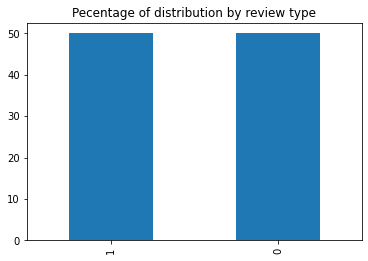

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentage for Defalut")
print(round(df.Liked.value_counts(normalize=True)*100,2))
round(df.Liked.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Pecentage of distribution by review type')
plt.show()

# Refining the Data

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] # this list will contain all the refined reviews

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [8]:
for i in range(0,1000):
    review = df['Review'][i] # collecting the reviews one by one
    review = re.sub('[^a-zA-Z]',' ',review)  # relacing the punctuations with space
    review = review.lower()  # converting all the characters to lowercase
    review = review.split() # converting a statement to list of words
    ps = PorterStemmer() # creating the object for PorterStemmer class
    all_stopwords = stopwords.words('english') # collecting the english language stopwords
    #removing not words from the stopwords
    st = ['not','no','don',"don't",'wasn',"wasn't", 'weren', "weren't", 'won', "won't",'wouldn', "wouldn't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',"shouldn't"]
    for stop in range(len(st)):
        all_stopwords.remove(st[stop])
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    #coverting the list of words back to statement using 'join()'
    review = ' '.join(review)
    corpus.append(review)
#print(corpus)
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

## Creating Bag of Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
 # using max_features parameter of CountVectorizer limits the number of columns in x
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

## Frequency Count Method

In [10]:
#creating a vocabulary(list of all words)
vocab = []
for i in corpus:
    words = i.split()
    vocab.extend(words)
# print(vocab)
#removing repeated words in vocab
unq_words = list(set(vocab))
# print(unq_words)
len(unq_words)

1580

## Creating a dictionary

In [11]:
yslist = df.iloc[:,-1].values
#print(yslist)
print(len(yslist))
print(len(corpus))
freqs = {}
for y, review in zip(yslist, corpus):
    print(y,review)
    for word in review.split():
        pair = (word, y)
        #print(pair)
        if pair in freqs:
            freqs[pair] += 1
        else:
            freqs[pair] = 1

print(freqs)

1000
1000
1 wow love place
0 crust not good
0 not tasti textur nasti
1 stop late may bank holiday rick steve recommend love
1 select menu great price
0 get angri want damn pho
0 honeslti didn tast fresh
0 potato like rubber could tell made ahead time kept warmer
1 fri great
1 great touch
1 servic prompt
0 would not go back
0 cashier no care ever say still end wayyy overpr
1 tri cape cod ravoli chicken cranberri mmmm
0 disgust pretti sure human hair
0 shock no sign indic cash
1 highli recommend
0 waitress littl slow servic
0 place not worth time let alon vega
0 not like
0 burritto blah
1 food amaz
1 servic also cute
1 could care less interior beauti
1 perform
1 right red velvet cake ohhh stuff good
0 never brought salad ask
1 hole wall great mexican street taco friendli staff
0 took hour get food tabl restaur food luke warm sever run around like total overwhelm
0 worst salmon sashimi
1 also combo like burger fri beer decent deal
0 like final blow
1 found place accid could not happier
0 

0 servic terribl food mediocr
1 defin enjoy
0 order albondiga soup warm tast like tomato soup frozen meatbal
0 three differ occas ask well done medium well three time got bloodiest piec meat plate
0 two bite refus eat anymor
0 servic extrem slow
0 minut wait got tabl
1 serious killer hot chai latt
0 no allergi warn menu waitress absolut no clue meal not contain peanut
1 boyfriend tri mediterranean chicken salad fell love
1 rotat beer tap also highlight place
0 price bit concern mellow mushroom
0 worst thai ever
1 stay vega must get breakfast least
1 want first say server great perfect servic
1 pizza select good
1 strawberri tea good
0 highli unprofession rude loyal patron
1 overal great experi
0 spend money elsewher
1 regular toast bread equal satisfi occasion pat butter mmmm
0 buffet bellagio far anticip
0 drink weak peopl
0 order not correct
0 also feel like chip bought not made hous
0 disappoint dinner went elsewher dessert
1 chip sal amaz
0 won return
1 new fav vega buffet spot
0 s

## Feature Extraction

In [12]:
x = np.zeros((1000,3),dtype = int)

#setting bias terms i.e., 1
for i in range(1000):
    x[i,0] = 1

for i,review in zip(range(1000),corpus):
    for word in review.split():
        # increment the word count for the positive label 1
        x[i,1] += freqs.get((word, 1.0),0)

        # increment the word count for the negative label 0
        x[i,2] += freqs.get((word, 0.0),0)
print(x)

[[  1  93  55]
 [  1  91 122]
 [  1  27 106]
 ...
 [  1  94 307]
 [  1  76 107]
 [  1  40  68]]


In [13]:
x_ind = x

# Applying PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_ind = pca.fit_transform(x_ind)
var = pca.explained_variance_ratio_
print(var)

[0.80873661 0.19126339]


# Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,yslist,test_size = 0.2,random_state = 6)
print("shape of x_train - ",x_train.shape)
print("shape of y_train - ",y_train.shape)
print("shape of x_test - ",x_test.shape)
print("shape of x_test - ",x_test.shape)

shape of x_train -  (800, 3)
shape of y_train -  (800,)
shape of x_test -  (200, 3)
shape of x_test -  (200, 3)


# Model - 1 - Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
svm = SVC(kernel = 'linear',random_state = 6)

## Creating Pipeline

In [17]:
from sklearn.pipeline import Pipeline
model = Pipeline([('classifier',svm)])
model.fit(x_train,y_train)

Pipeline(steps=[('classifier', SVC(kernel='linear', random_state=6))])

## Prediction

In [18]:
yhat = model.predict(x_test)

## Plotting Confusion Matrix and Calculating Accuracy Score

0.905


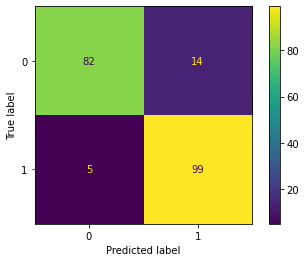

In [19]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(estimator = svm ,X = x_test, y_true = y_test)
print(accuracy_score(yhat,y_test))

# Model - 2 - K Nearest Neighbor (KNN) 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)

## Creating Pipeline

In [21]:
from sklearn.pipeline import Pipeline
model = Pipeline([('classifier',knn)])
model.fit(x_train,y_train)

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=10))])

## Prediction

In [22]:
yhat = model.predict(x_test)

## Plotting Confusion Matrix and Calculating Accuracy Score

0.905
Accuracy of the model is -  90.5 %


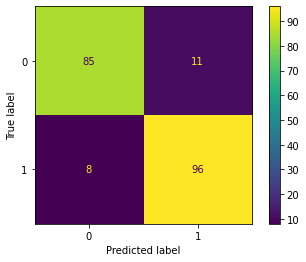

In [29]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(estimator = knn ,X = x_test, y_true = y_test)
accuracy = accuracy_score(yhat,y_test)
print(accuracy_score(yhat,y_test))
print("Accuracy of the model is - ",accuracy*100,"%")

# Model - 3 - Support Vector Machine with PCA (SVM with PCA)

In [24]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x_ind,yslist,test_size = 0.2,random_state = 6)

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
svm = SVC(kernel = 'linear',random_state  = 6)

## Creating Pipeline

In [26]:
from sklearn.pipeline import Pipeline
model = Pipeline([('classifier',svm)])
model.fit(x_tr,y_tr)

Pipeline(steps=[('classifier', SVC(kernel='linear', random_state=6))])

## Prediction

In [27]:
y_pr = model.predict(x_te)

## Plotting Confusion Matrix and Calcuating accuracy score.

0.905


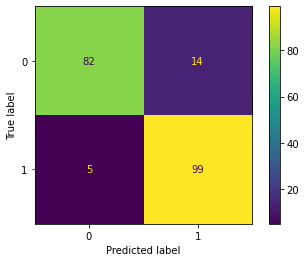

In [28]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(estimator = svm ,X = x_te, y_true = y_te)
print(accuracy_score(yhat,y_test))